In [1]:
2


2

In [2]:
print("Hello World")

Hello World


 ## Real Estate- Price Predicator

In [3]:
import pandas as pd

In [4]:
housing = pd.read_csv("data.csv")

In [5]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
 housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [8]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285615,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704265,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
%matplotlib inline 

In [10]:
import matplotlib.pyplot as pit

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

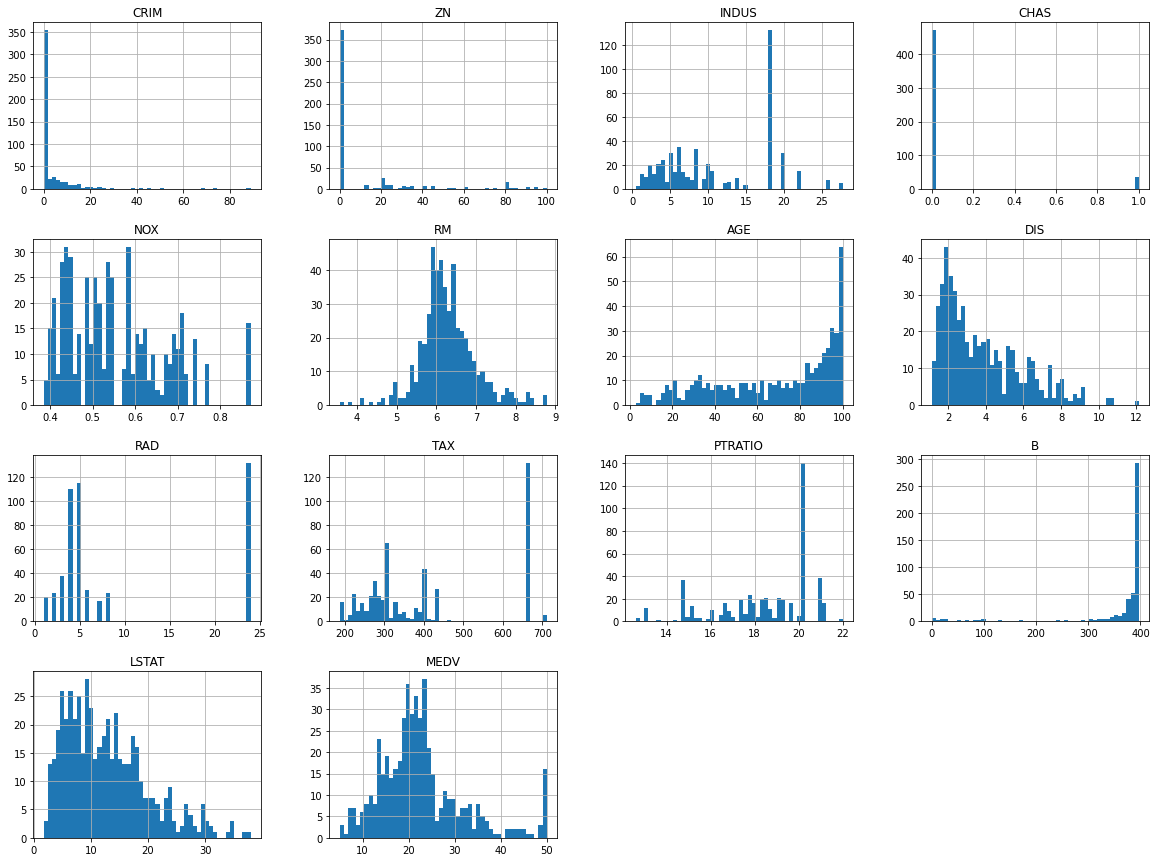

In [11]:
housing.hist(bins=50,figsize=(20,15))

 ## Train-Test Splitting

In [12]:
#for learning puspose only
import numpy as np

def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size= int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [13]:
train_set,test_set=split_train_test(housing,0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [14]:
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set: 405
Rows in test set:101



In [15]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set: 404
Rows in test set:102



In [16]:
## stratisfied sampling we have to do on CHAS basis

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index , test_index in split.split(housing,housing['CHAS']):
    strat_train_set =housing.loc[train_index]
    strat_test_set=housing.loc[test_index]




In [17]:
strat_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281175,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714265,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [18]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [19]:
 strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

## Looking for Correlations

In [20]:
corr_matrix=housing.corr()

In [21]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.694699
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

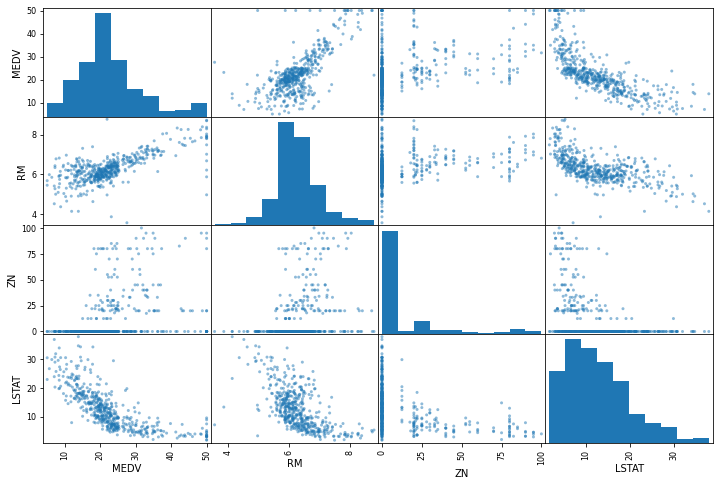

In [22]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

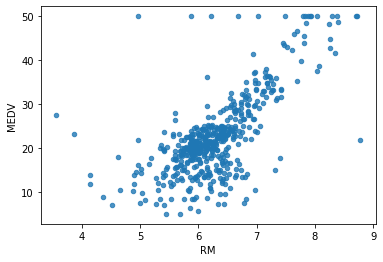

In [23]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

## Trying out attribute combinations

In [24]:
housing["TAXRM"]=housing['TAX']/housing['RM']

In [25]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [26]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.694699
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.539016
LSTAT     -0.737663
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

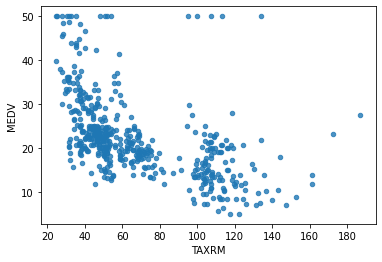

In [27]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

## Missing Arrtirbues

In [28]:
# To take care of the missing attribus , you have three options :
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0,mean or median)..#

In [29]:
a=housing.dropna(subset=["RM"]) #option 1


In [30]:
a.shape

(501, 15)

In [31]:
housing.drop("RM",axis=1).shape  #option2
#NOte that there is no RM column and also that thd original housing dataframe will remain unchanged

(506, 14)

In [32]:
median=housing["RM"].median()

In [33]:
housing["RM"].fillna(median) #option 3
#note that the orginal housing dataframe will remain unchanged

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [34]:
housing.shape

(506, 15)

In [35]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_.shape

(15,)

In [37]:
imputer.statistics_

array([2.56510000e-01, 0.00000000e+00, 9.69000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20900000e+00, 7.75000000e+01, 3.20745000e+00,
       5.00000000e+00, 3.30000000e+02, 1.90500000e+01, 3.91440000e+02,
       1.13600000e+01, 2.12000000e+01, 5.36057273e+01])

In [39]:
X=imputer.transform(housing)

In [45]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [ ]:
housing_tr=